<a href="https://colab.research.google.com/github/na2027/CE888/blob/main/Copy_of_bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df=df.drop(['duration'],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Exploratory Analysis:
Categorical Variables:


In [ ]:
# find categorical variables

categorcial_variables = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorcial_variables)))

print('The categorical variables are :', categorcial_variables)

There are 11 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


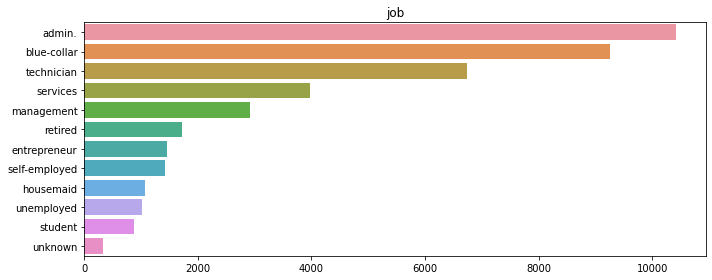

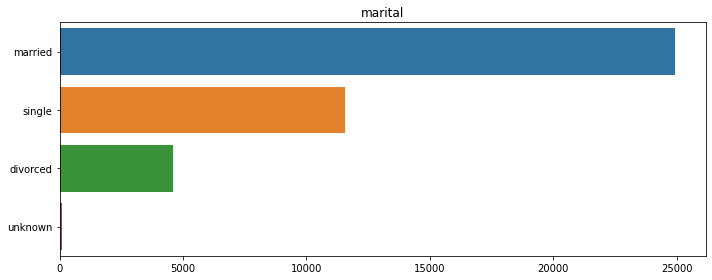

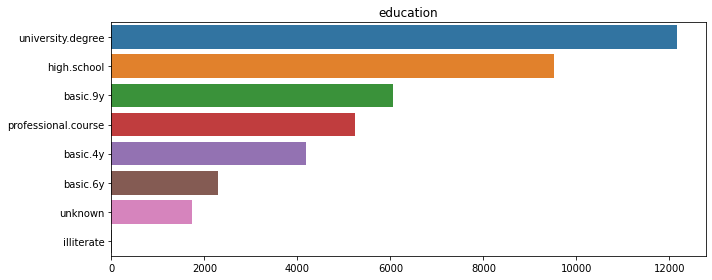

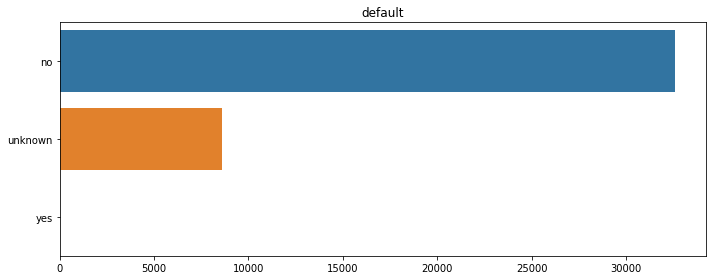

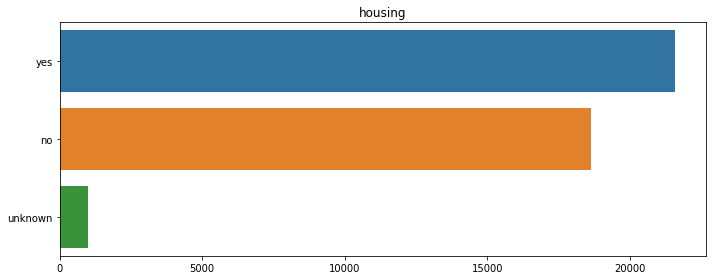

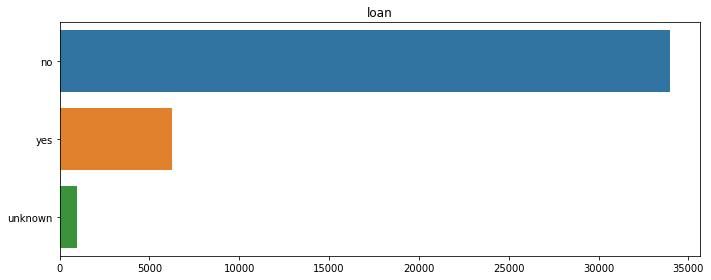

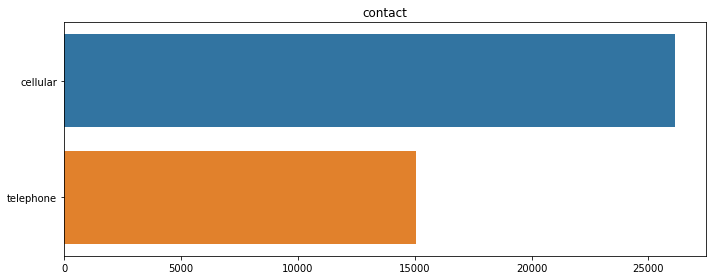

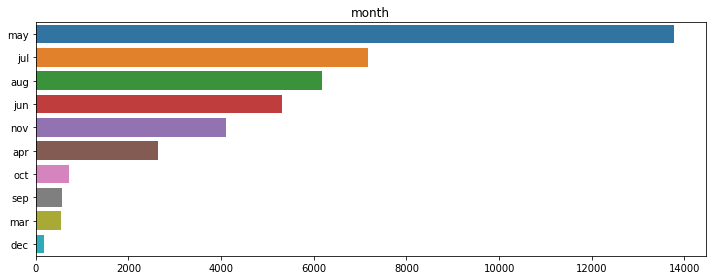

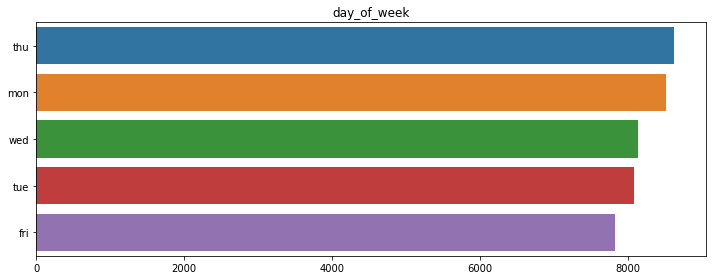

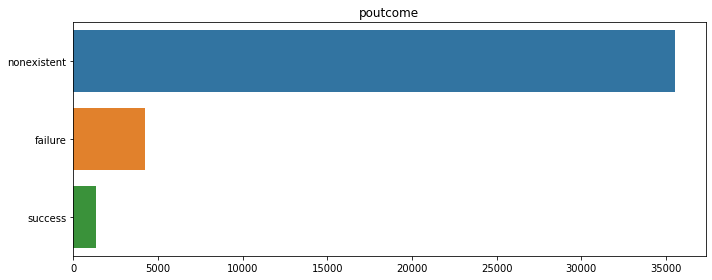

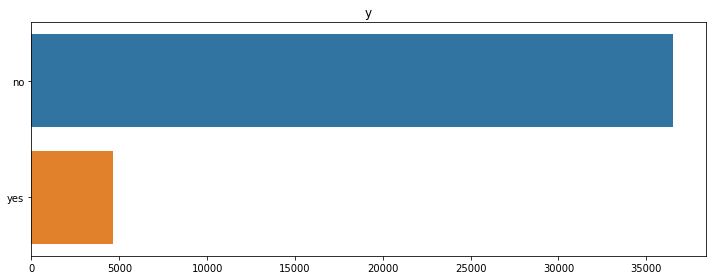

In [ ]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [ ]:
df[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

In [ ]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.job, drop_first=True).head()


,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
pd.get_dummies(df.marital, drop_first=True).head()

,married,single,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
pd.get_dummies(df.education, drop_first=True).head()

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
pd.get_dummies(df.default, drop_first=True).head()

,unknown,yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [ ]:
pd.get_dummies(df.housing, drop_first=True).head()

,unknown,yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
pd.get_dummies(df.loan, drop_first=True).head()

,unknown,yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
pd.get_dummies(df.contact, drop_first=True).head()

,telephone
0,1
1,1
2,1
3,1
4,1


In [ ]:
pd.get_dummies(df.month, drop_first=True).head()

,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
pd.get_dummies(df.day_of_week, drop_first=True).head()

,mon,thu,tue,wed
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


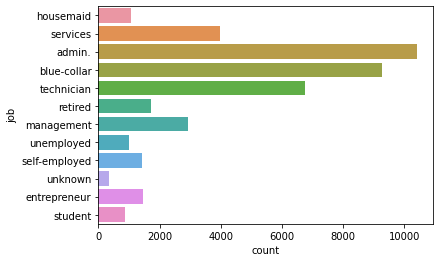

In [ ]:
print(df.job.value_counts())
sns.countplot(y='job', data=df)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


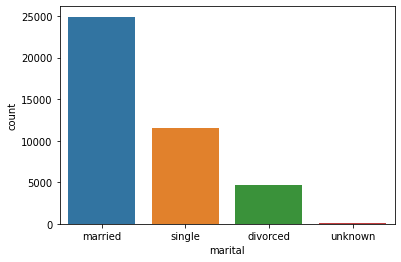

In [ ]:
print(df.marital.value_counts())
sns.countplot(x='marital', data=df)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


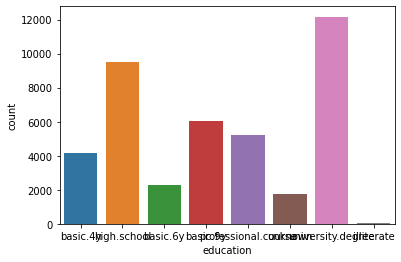

In [ ]:
print(df.education.value_counts())
sns.countplot(x='education', data=df)

LabelEncoder

In [ ]:
y_valus ={'yes' : 1, 'no' : 0}
df['y'] = df['y'].map(lambda x: y_valus[x])
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
y = df['y']

In [ ]:
df.drop(['y'], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
df.shape

(41188, 19)

In [ ]:
df.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [ ]:
df.shape

(41188, 14)

In [ ]:
#splitting the data 
x_train, lbl_x_test, y_train, lbl_y_test = model_selection.train_test_split(df, y, test_size=0.2, random_state=50)
lbl_x_train, lbl_x_cv, lbl_y_train, lbl_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10]
n_estimators =  [20, 40, 60, 80, 100]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(lbl_x_train,lbl_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

ValueError: ignored